In [1]:
from mcmr_crosstalk_comp_basis import MCMR_Crosstalk_Comp_Basis_Experiment
from selene_sim import DepolarizingErrorModel, Stim, Quest
from pecos_selene import PecosGeneralErrorModel

In [2]:
from collections import Counter
from hugr.qsystem.result import QsysResult
from selene_sim import build, Stim
from pecos_selene import qsystem_model_alpha
from selene_anduril import AndurilRuntimePlugin as AndurilRuntime
from selene_sim import SimpleLeakageErrorModel
from selene_eldarion import register_eldarion, QtmPlatformPlugin
register_eldarion()

In [3]:
# index of focus qubit(s) that receives repeated MCMR.  Must be chosen from the zone qubits (q[0:15]) .  
focus_qubits = [0] # [0,2,4,6,8,10,12,14]

seq_lengths = [1, 100] #  intermediate shot lengths needed to resolve possible quadratic dependencies (memory error).

# datetime labelling ensures that the pickle filename is unique and informative.
import datetime
x = datetime.datetime.now()
filename = f'./exp_MCMR_Crosstalk_comp_basis_q{focus_qubits}_{x}.p'
print(filename)

exp = MCMR_Crosstalk_Comp_Basis_Experiment(focus_qubits, seq_lengths, filename=filename)
exp.add_settings()

./exp_MCMR_Crosstalk_comp_basis_q[0]_2025-10-21 17:39:16.506992.p


In [1]:
# or load an existing experiment from working directory

# filename = <Insert filename>
# exp = MCMR_Crosstalk_Experiment.load(filename)

### Run local simulation using Selene

In [5]:
# Setup error model

# error_model = PecosGeneralErrorModel(
#         p_meas_crosstalk=1e-4,
#         p_prep_crosstalk=1e-4
#     )

error_model = qsystem_model_alpha(random_seed=12, p_meas_crosstalk=1e-2,p_prep_crosstalk=1e-2)


/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/.venv_2/lib/python3.12/site-packages/pecos_selene/error_models/named.py:35: UserWarning: 


* The crosstalk channels are implemented using a very naive model.

* Leakage and memory error are implemented as in H1/H2, but it is expectedthese will change significantly in Helios.

* The noise parameter values are rough estimates, using a combination of target values for Helios and values from H2's model. These have not been verified by benchmarking experiments on the device.

* Anduril (the component that decides ion transport) does not currently report accurate timing estimates. This affects the memory error.

  warnings.warn(msg)


In [6]:
# simulate experiment

shots = 200
simulator = Stim()

exp.sim(shots, error_model = error_model, simulator=simulator)


Simulating ...
1/4 circuits complete
2/4 circuits complete
3/4 circuits complete
4/4 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [4]:
import qnexus

In [5]:
# Choose domain and login to Nexus

import qnexus

### uncomment lines below if submitting to QA ###
#from qnexus.config import CONFIG
#CONFIG.domain = "qa.myqos.com"

qnexus.login_with_credentials()

Enter your Nexus email:  victor.colussi@quantinuum.com
Enter your Nexus password:  ········


✅ Successfully logged in as victor.colussi@quantinuum.com.


In [5]:
# choose nexus project

project = qnexus.projects.get_or_create(name='MCMR-crosstalk-example-project')
qnexus.context.set_active_project(project)

In [ ]:
# Simualtion:  setup quantinuum backend config


# device_name = 'Helios-1' to submit to hardware.
# stabilizer sim needed for 98 qubit job.
backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000) 

In [6]:
# Hardware:  setup quantinuum backend config
from quantinuum_schemas.models.backend_config import QuantinuumCompilerOptions

priority = 'high'
compiler_options = QuantinuumCompilerOptions(priority=priority)
backend_config = qnexus.QuantinuumConfig(device_name='Helios-1', compiler_options=compiler_options, max_cost=1000000)

In [7]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 1000

execute_job_ref = exp.submit(shots, backend_config)

Experiment saved! ./exp_MCMR_Crosstalk_comp_basis_q[0]_2025-10-21 17:39:16.506992.p


In [13]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 10, 22, 1, 45, 46, 441759, tzinfo=datetime.timezone.utc), queued_time=datetime.datetime(2025, 10, 21, 23, 40, 33, 799479, tzinfo=datetime.timezone.utc), submitted_time=datetime.datetime(2025, 10, 21, 23, 39, 40, 229773, tzinfo=datetime.timezone.utc), running_time=datetime.datetime(2025, 10, 21, 23, 41, 32, 535568, tzinfo=datetime.timezone.utc), cancelled_time=None, error_time=None, queue_position=None)

In [14]:
# retrieve results

exp.retrieve(execute_job_ref)

Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider 

Experiment saved! ./exp_MCMR_Crosstalk_comp_basis_q[0]_2025-10-21 17:39:16.506992.p


### Retrieve experiment results

/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_comp_basis.py:577: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y) #, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))
/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_comp_basis.py:242: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y)


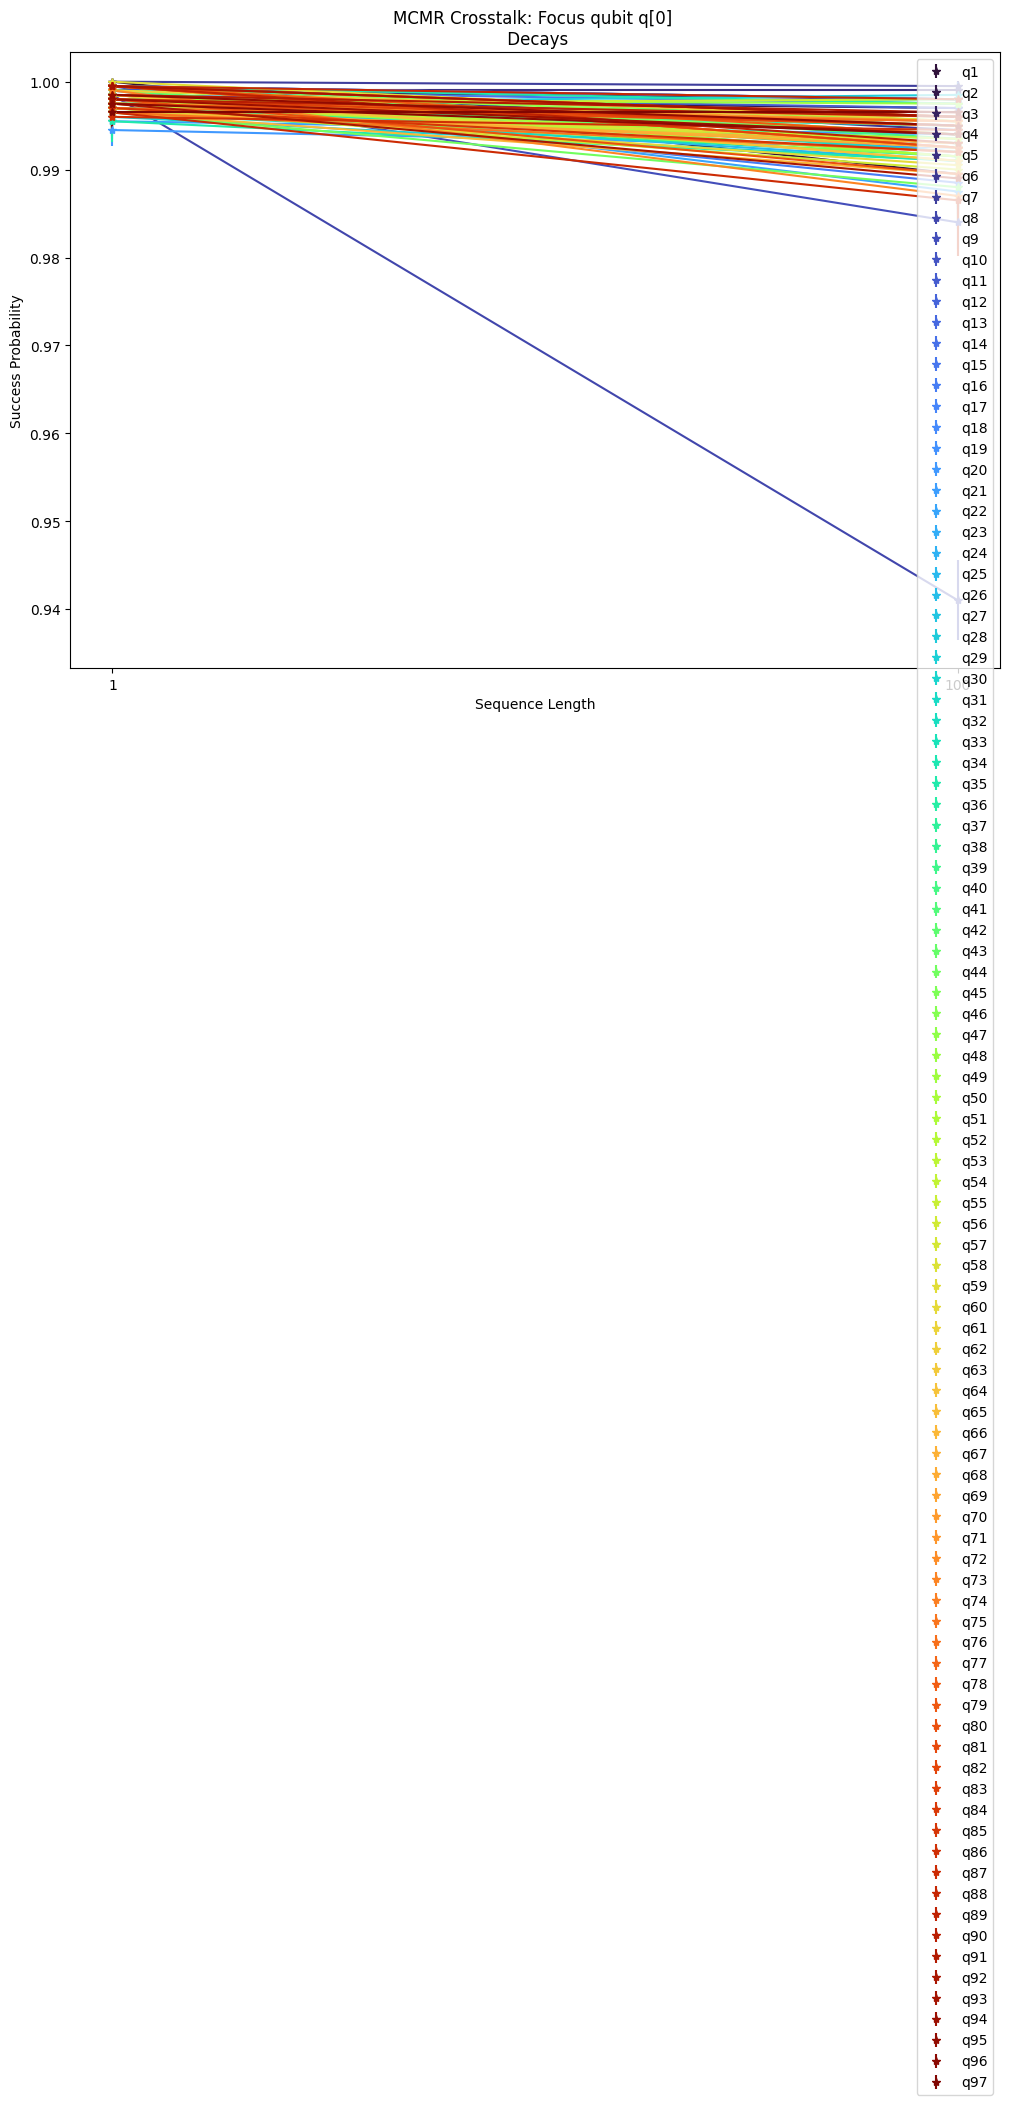

Average State Infidelities
------------------------------
qubit 1: 0.000106 +/- 2.3e-05
qubit 2: 1e-05 +/- 1.7e-05
qubit 3: 1e-05 +/- 1.8e-05
qubit 4: 2e-05 +/- 2.8e-05
qubit 5: 0.0 +/- 1.2e-05
qubit 6: 5.1e-05 +/- 2.8e-05
qubit 7: 5e-06 +/- 6e-06
qubit 8: 0.000581 +/- 4.8e-05
qubit 9: 0.000157 +/- 3.2e-05
qubit 10: 4e-05 +/- 2.6e-05
qubit 11: 1.5e-05 +/- 1.5e-05
qubit 12: 1.5e-05 +/- 1.1e-05
qubit 13: 1.5e-05 +/- 1.4e-05
qubit 14: 4.5e-05 +/- 3.2e-05
qubit 15: 1.5e-05 +/- 1.7e-05
qubit 16: 9.6e-05 +/- 3.9e-05
qubit 17: 7.6e-05 +/- 2.7e-05
qubit 18: 3.5e-05 +/- 2.7e-05
qubit 19: 1.5e-05 +/- 2.1e-05
qubit 20: 2e-05 +/- 3.5e-05
qubit 21: 1.5e-05 +/- 4.3e-05
qubit 22: 0.000116 +/- 4.4e-05
qubit 23: 5.6e-05 +/- 2.3e-05
qubit 24: -5e-06 +/- 1.8e-05
qubit 25: 6.1e-05 +/- 3.3e-05
qubit 26: 4e-05 +/- 2.6e-05
qubit 27: 2e-05 +/- 3.3e-05
qubit 28: -1e-05 +/- 2.3e-05
qubit 29: 5.1e-05 +/- 5.9e-05
qubit 30: 4.5e-05 +/- 3.4e-05
qubit 31: 6.6e-05 +/- 3.7e-05
qubit 32: 5.1e-05 +/- 3.9e-05
qubit 33: 7

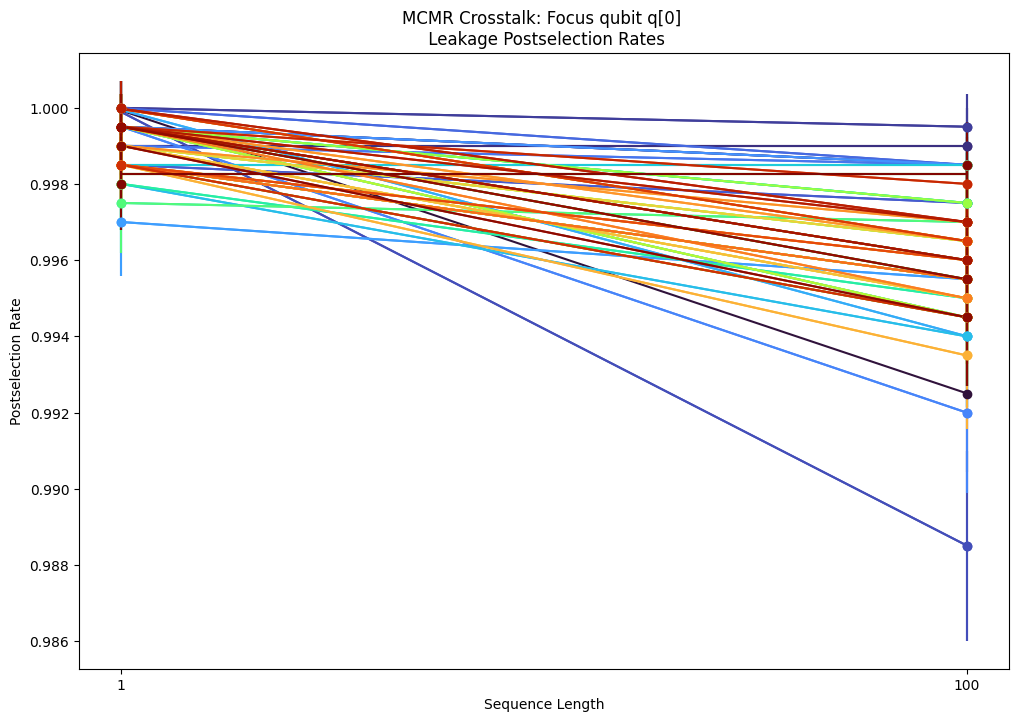

Average leakage rates
------------------------------
qubit 1: 7.5e-05 +/- 2.2e-05
qubit 2: 1e-05 +/- 1.4e-05
qubit 3: 1e-05 +/- 1.4e-05
qubit 4: 0.0 +/- 1.4e-05
qubit 5: 0.0 +/- 1.4e-05
qubit 6: 5e-06 +/- 1.1e-05
qubit 7: 5e-06 +/- 1.1e-05
qubit 8: 0.000115 +/- 2.6e-05
qubit 9: 0.000115 +/- 2.6e-05
qubit 10: 1e-05 +/- 1.7e-05
qubit 11: 1e-05 +/- 1.7e-05
qubit 12: 1.5e-05 +/- 1.3e-05
qubit 13: 1.5e-05 +/- 1.3e-05
qubit 14: 5e-06 +/- 1.5e-05
qubit 15: 5e-06 +/- 1.5e-05
qubit 16: 7.6e-05 +/- 2.3e-05
qubit 17: 7.6e-05 +/- 2.3e-05
qubit 18: 1e-05 +/- 1.4e-05
qubit 19: 1e-05 +/- 1.4e-05
qubit 20: 1.5e-05 +/- 2.2e-05
qubit 21: 1.5e-05 +/- 2.2e-05
qubit 22: 6e-05 +/- 2e-05
qubit 23: 6e-05 +/- 2e-05
qubit 24: 0.0 +/- 1.7e-05
qubit 25: 4e-05 +/- 2.3e-05
qubit 26: 4e-05 +/- 2.3e-05
qubit 27: 0.0 +/- 1.6e-05
qubit 28: 0.0 +/- 1.6e-05
qubit 29: 5.1e-05 +/- 2e-05
qubit 30: 5.1e-05 +/- 2e-05
qubit 31: 3.5e-05 +/- 1.8e-05
qubit 32: 5e-06 +/- 2e-05
qubit 33: 2e-05 +/- 1.6e-05
qubit 34: 2e-05 +/- 1.6e-0

/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_comp_basis.py:577: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y) #, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))


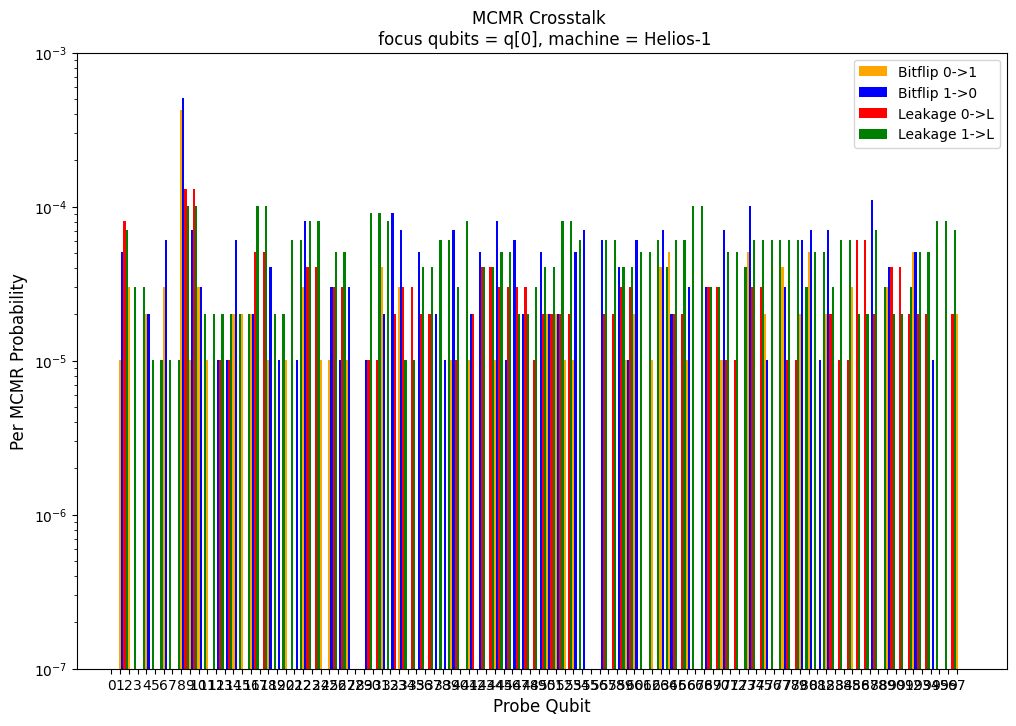

Average error rates
--------------------------------------------------
Bitflip 0->1: 1.1e-05 +/- 5e-06
Bitflip 1->0: 2.6e-05 +/- 6e-06
Leakage 0->L: 1.6e-05 +/- 3e-06
Leakage 1->L: 4.5e-05 +/- 3e-06
--------------------------------------------------


Error channel estimates of fidelities
--------------------------------------------------
Average state infidelity:  4.3e-05
Average process infidelity:  4.9e-05
--------------------------------------------------






In [15]:
# qubits 0-15 reflect crosstalk in the gatezone.
# qubits 16-97 reflect crosstalk in the gatezone.

# perhaps there's a more elegant way to give the results that breaks it up into gatezone/ring...
exp.analyze_results()

In [17]:
# save experiment object to working directory

exp.save()

Experiment saved! ./exp_MCMR_Crosstalk_comp_basis_q[0]_2025-10-21 17:39:16.506992.p


In [9]:
# (Optional) generate dfl
# requires qmcparser:  https://co41-bitbucket.honeywell.lab:4443/projects/TBC/repos/qmcparser/browse

from qmcparser.parser import get_dfl

# I like to make a subfolder for dfl.
output_filename = f'./dfl/dfl_MCMR_Crosstalk_Comp_Basis_q{focus_qubits}_{x}.cl'
print(output_filename)

# which circuit do you want the dfl for?
job_ind = -1
dfl = get_dfl(exp.make_circuit(exp.settings[job_ind]), output_file_name=output_filename)

./dfl/dfl_MCMR_Crosstalk_Comp_Basis_q[0]_2025-10-21 17:39:16.506992.cl
Processing shot 0
